## $\textbf{ACML Assignment II 2022 }$
### Fezile Mahlangu 2089676

Asteroseismology is the study of oscillations in stars. This dataset is a binary classification were we classify between defining oscillating stars ascending the red giant branch (class 0) and those that have commenced helium core burning (class 1)

Columns description:

Pop:[0/1] where 0=RGB (Red Giant Branch) and 1=HeB (Helium Burning)

Dnu: Mean large frequency separation of modes with the same degree and consecutive order

numax: Frequency of maximum oscillation power

epsilon: Location of the l=0 mode (2)


In [1]:
# imports
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as pyplot
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [3]:
#read in csv file 
df = pd.read_csv('asteroseismology.csv')
df.info()

print(df.to_string()) #print out csv
# print(df.head())

df=df.sort_values("POP")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   POP      1001 non-null   int64  
 1   Dnu      1001 non-null   float64
 2   numax    1001 non-null   float64
 3   epsilon  1001 non-null   float64
dtypes: float64(3), int64(1)
memory usage: 31.4 KB
      POP       Dnu      numax  epsilon
0       1   4.44780   43.06289    0.985
1       0   6.94399   74.07646    0.150
2       1   2.64571   21.57891    0.855
3       1   4.24168   32.13189    0.840
4       0  10.44719  120.37356    0.275
5       1   4.31470   37.59315    0.945
6       1   4.46724   46.71595    0.985
7       0   7.63714   87.44575    0.215
8       1   4.07682   34.78433    0.885
9       1   4.15871   31.50166    0.855
10      0   9.43448  108.11181    0.205
11      1   3.90815   33.33387    0.810
12      0   5.56773   53.39078    0.120
13      0   5.70470   56.78251    0.105
14      1   4.4

### $\textbf{Visualisation of the whole dataset}$

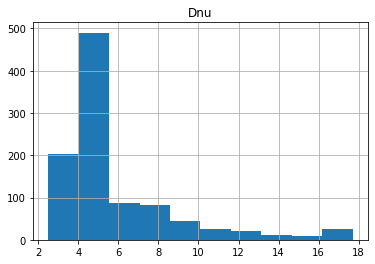

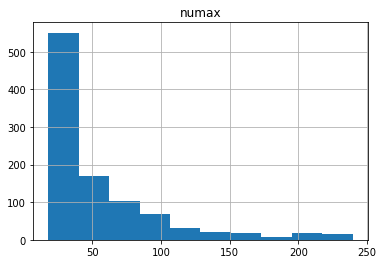

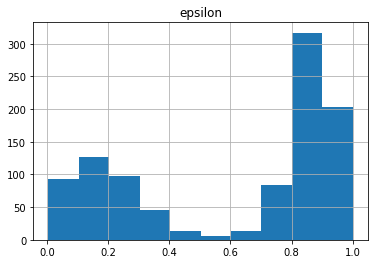

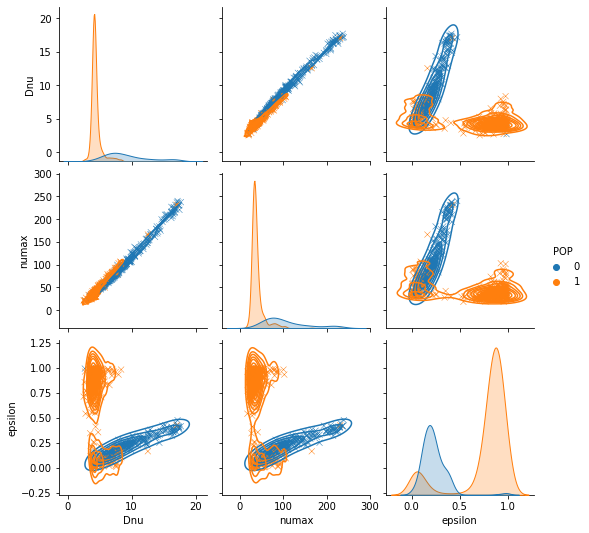

In [4]:
df.hist(column='Dnu') #histogram 
df.hist(column='numax') #histogram
df.hist(column='epsilon') #histogram

myseaborn = sns.pairplot(df, hue='POP', markers='x') #pair plot using seaborn 
myseaborn = myseaborn.map_upper(sns.kdeplot)
myseaborn = myseaborn.map_lower(sns.kdeplot)

Based on observations, the higher Dnu, numax and epsilon values belong to class 1. Only a small fraction of the stars' features overlap and will not be easily distinguished. Also worth noting that all the features have varying ranges. Dnu ranges between 0-18, numax ranges between 0-250 and epsilon ranges between 0-1. 

In [5]:
# DATA IS SPLIT INTO TRAINING, TESTING AND VALIDATION DATASETS 
# 60% TRAINING
# 20% VALIDATION
# 20% TESTING

testingData = pd.read_csv('TestingAsteroseismology.csv')
testingData=testingData.sort_values("POP") #sort by POP

trainingData = pd.read_csv('TrainingAsteroseismology.csv')
trainingData=trainingData.sort_values("POP") #sort by POP

validationData = pd.read_csv('ValidationAsteroseismology.csv')
validationData=validationData.sort_values("POP") #sort by POP

#getting the dimensions
rows, col = trainingData.shape
print(rows,col)
rowsTest, colTest= testingData.shape
rowsValid, colValid = validationData.shape

#extrating the target column
yTraining=trainingData['POP'].values
yTesting=testingData['POP'].values
yValidation=validationData['POP'].values

#extracting the features 
XTraining = trainingData.drop(['POP'], axis=1).values # Input Feature Values
XTesting = testingData.drop(['POP'], axis=1).values # Input Feature Values
XValidation = validationData.drop(['POP'], axis=1).values # Input Feature Values


# implementing the design matrix 
XTraining = np.hstack(((np.ones((rows,1))), XTraining)) #design matrix (append 1 as a bias)
# print(XTraining)
# print(yTraining)
XTesting = np.hstack(((np.ones((rowsTest,1))), XTesting)) #design matrix (append 1 as a bias)
XValidation = np.hstack(((np.ones((rowsValid,1))), XValidation)) #design matrix (append 1 as a bias)


#the mean and stardard deviation will be stored for each data set 

trainingFeatureMean=[]
trainingFeatureMean.append(trainingData.describe()['Dnu']['mean'])
trainingFeatureMean.append(trainingData.describe()['numax']['mean'])
trainingFeatureMean.append(trainingData.describe()['epsilon']['mean'])

# print(validationData.describe())
#Storing mean from each feature from the validation data set 
validationFeatureMean=[]
validationFeatureMean.append(validationData.describe()['Dnu']['mean'])
validationFeatureMean.append(validationData.describe()['numax']['mean'])
validationFeatureMean.append(validationData.describe()['epsilon']['mean'])

#Storing mean from each feature from the testing data set 
testingFeatureMean=[]
testingFeatureMean.append(testingData.describe()['Dnu']['mean'])
testingFeatureMean.append(testingData.describe()['numax']['mean'])
testingFeatureMean.append(testingData.describe()['epsilon']['mean'])

#Storing standard deviation from each feature from the testing data set
trainingFeatureStd=[]
trainingFeatureStd.append(trainingData.describe()['Dnu']['std'])
trainingFeatureStd.append(trainingData.describe()['numax']['std'])
trainingFeatureStd.append(trainingData.describe()['epsilon']['std'])

#Storing standard deviation from each feature from the validation data set
validationFeatureStd=[]
print(validationData.describe())
validationFeatureStd.append(validationData.describe()['Dnu']['std'])
validationFeatureStd.append(validationData.describe()['numax']['std'])
validationFeatureStd.append(validationData.describe()['epsilon']['std'])


#Storing standard deviation from each feature from the testing data set
testingFeatureStd=[]
testingFeatureStd.append(testingData.describe()['Dnu']['std'])
testingFeatureStd.append(testingData.describe()['numax']['std'])
testingFeatureStd.append(testingData.describe()['epsilon']['std'])


600 4
              POP         Dnu       numax     epsilon
count  201.000000  201.000000  201.000000  201.000000
mean     0.706468    5.858841   59.901265    0.614005
std      0.456517    3.345402   48.978395    0.344752
min      0.000000    2.704660   18.198360    0.005000
25%      0.000000    4.059740   33.353370    0.220000
50%      1.000000    4.276220   37.482430    0.820000
75%      1.000000    6.361780   64.496230    0.890000
max      1.000000   17.699430  237.110610    0.995000


 ### $\textbf{Basic implementation of neural network trained using back-propagation }$


The dataset consists of 3 features, namely Dnu, numax and epsilon. It is a binary classification where the target "POP" can either be 0 or 1. The first layer of the network will thus have 4 nodes including the bias node. The last layer of the network will consist of one node as this is a binary classification problem. We will begin with implementing a simple network that has 1 hidden layer. The hidden layer will therefore have 4 nodes including the bias node. 

With this basic network setup, 2 weight matrices will be required. The first weight matrix $\Theta^{(1)} \in \mathbb{R}^{3x4}$ and the second weight matrix  $\Theta^{(2)} \in \mathbb{R}^{1x4}$. The weights will be initially randomized. 

For the activation function, we shall use a sigmoid function $\frac{1}{1+e^{-x}}$ (other functions will be explored later) . 

Before back propagation is implemented, ${a^{2},...,a^{L}}$ has to be evaluated by forward propagation using the feed-forward method.

Feed-forward Steps:

$a^{(1)}=x$ where $x$ is the input features which include the bias.

$z^{(2)}=\Theta^{(1)}a^{(1)}$ 

$a^{(2)}=g(z^{(2)})$ where $g$ is the activation function which in this case is the sigmoid function. 

We then add the bias $a_{0}^{(2)}=1$

$z^{(3)}=\Theta^{(2)}a^{(2)}$

$h_{\theta}(x)=a^{(3)}=g(z^{(3)})$

In [6]:
#This will calculate the accuracy of the model by counting how many prediction the model got correct and divide it by the number of y_values. 
#This will be then multiplied by 100 to give a percentage. 

def accuracy(predictedY,y_values):
    sum=0
    n=len(y_values)
    for i in range(n):
        if(predictedY[i]==y_values[i]):
            sum+=1
    return sum/n*100

In [7]:
#function that classifies the output based on the activation function used.
def classify(h,rows,activation):

    if(activation=="sigmoid"):
   
        for i in range(rows):
            if(h[i]>=0.5):
                h[i]=1
            else:
                h[i]=0
    elif(activation=="tanh"):
        h=np.round(h)
    else:
        for i in range(rows): #ReLU
            if(h[i]>=0.5):
                h[i]=1
            else:
                h[i]=0

    return h
    

Sigmoid:

In [8]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

Sigmoid derivative:

In [9]:
def sigmoid_derivative(x):
    return x*(1-x)

Forward prop:

In [10]:
def forward(Theta1,Theta2,X,rows):
    a=sigmoid(np.dot(Theta1,X.T)) #forward prop the input into the hidden layer 

    abias=np.hstack(((np.ones((rows,1))), a.T)) #adding bias to a
    
    h=sigmoid(np.dot(Theta2,abias.T)) #forward prop the hidden layer into the output node 

    return a,h

We will train the network using backpropagation which is implemented as follows:

since we have 3 layers, we have

$\delta^{(3)}=a^{(3)}-y$ where $a^{(3)}=h_{\theta}(x)$ and $y$ is the true target value of the data set. 

$\delta^{(2)}=(\Theta^{(2)})^{T}\delta^{(3)}*g^{'}(z^{(2)})$ 

where the derivative $g^{'}(z^{(2)})=a^{(2)}*(1-a^{(2)})$ $a_{2}$ has no bias

We do not compute  $\delta^{1}$ as we do not change the input. 

We will then have $D^{l}_{ij}=D^{l}_{ij}+a^{l}_{j}\delta^{l+1}_{i}$

Then we will update our weights via a gradient step $\Theta^{l}_{ij}=\Theta^{l}_{ij}-\alpha D^{l}_{ij}$ where alpha is our learning rate.

This process will be repeated until the maximum number of epochs is reached. 

The cost function is given by $ J(\Theta)=-\sum \limits _{i=1}^{n} y_{i}  $ log $h_{\theta}(x_{i})+(1-y_{i})$ log $(1-h_{\theta}(x_{i}))$



In [11]:
def back(Theta1,Theta2,alpha,X,y,rows):
    epoch=60000 #number of iterations 

    errors=[] #this will store all the cost function errors
    for i in range(epoch): #this will run until the number of max epochs are reached 

        a,h=forward(Theta1,Theta2,X,rows) #computes {a2,a3} via forward prop
        h_delta=h-y  #computes delta(L)

        #computing the errors {delta(L-1),....,delta(2)}
        a_error= np.dot(Theta2.T[1:4],h_delta) 

        a_delta= a_error*sigmoid_derivative(a)

        #we will now compute the gradients Delta1, Delta2
        Delta1=np.dot(a_delta,X) #X=a1 #3x4

        a=np.hstack(((np.ones((rows,1))), a.T))
        Delta2=np.dot(a.T,h_delta.T).T #1x4


        #update weights via gradient step
        Theta1=Theta1-alpha*Delta1

        Theta2=Theta2-alpha*Delta2

        #computing the error 
        if i%1000==0:
            a,h=forward(Theta1,Theta2,X,rows)
            errors.append(-np.sum(y*np.log(h)+(1-y)*np.log(1-h)))

    return Theta1,Theta2,errors

Our initial weights (thetas) will be randomized. 

In [12]:
#the weights will be initially randomized to be float between 0 and 1
from numpy import random
random.seed(3)
Theta1=random.random((3, 4)) 
Theta2=np.random.rand(1,4)

In [422]:
#We will now train
def Train(Theta1,Theta2,alpha,X,y,rows,plotAcc):

    NewTheta1,NewTheta2,errors=back(Theta1,Theta2,alpha,X,y,rows) #back prop to get new weights 
    a2,h=forward(NewTheta1,NewTheta2,X,rows) #forward prop using new weights 

    h=h[0]
    h=classify(h,rows,"sigmoid")
    acc=accuracy(h,y)
    print("The model predicted values of Asteroseismology dataset with an accuracy of "+str(acc)+" %")

    #plot y against h_theta
    if(plotAcc=="True"):
        fig,ax1=pyplot.subplots()

        ax1.plot(np.arange(0,rows,1),y,label="True y",color='red')

        ax1.scatter(np.arange(0,rows,1),h.T,marker = '.',label="Predicted y",color='blue')

        ax1.set_ylabel("Stars")
        ax1.set_xlabel("Dataset y")
        ax1.set_title('True y values against predicted y values')
        ax1.legend()
    return errors



In [28]:
def plotError(errors):
    
    #plotting error over time
    fig,ax=pyplot.subplots()
    t=np.array(range(0,len(errors),1))*100
    ax.plot(t,errors,c='orange',label='Error over time')
    ax.set_title('Training Error over time')
    ax.set_ylabel("Error")
    ax.set_xlabel("Iterations")

    

The model predicted values of Asteroseismology dataset with an accuracy of 68.0 %


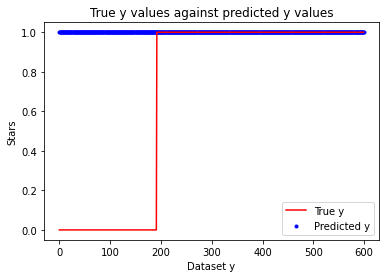

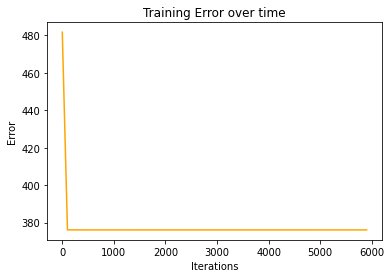

In [424]:
errors=Train(Theta1,Theta2,0.00005,XTraining,yTraining,rows,"True")
plotError(errors)

With our initial architecture, our model does not perform well. One can observe the inaccuracies from the first graph where the model predicts 1 for every input.  The error over time does decrease but the error is still high at the end of training (looking at the y axis from the second graph) hence the low accuracy. 

We will now perform feature standardization to see if it has an effect on the performance. From observation, the ranges in the features of the dataset are very different so we will standardize the features with the aim of our algorithm converging faster and more smoothly.

For each feature, we will standardize it such that there is zero mean and unit variance 

To standardize we will perform $x_{j}=\frac{{x_{j}-\mu_{j}}}{s_{j}}$ where $j=1...d$ 

In [13]:
for i in range(col-1):
    for j in range(rows): #row by column
        XTraining[j][i+1]=(XTraining[j][i+1]-trainingFeatureMean[i])/trainingFeatureStd[i]

We will now plot our features to display the effect of feature standardization.

array([[<AxesSubplot:title={'center':'epsilon'}>]], dtype=object)

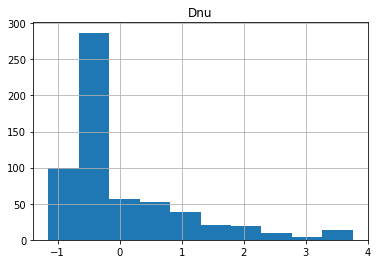

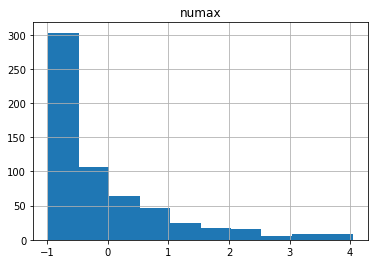

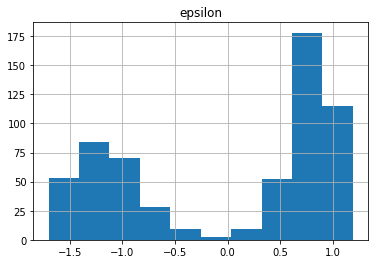

In [426]:
Dnu=[]
numax=[]
eps=[]

for i in range(rows):
    Dnu.append(XTraining[i][1])
    numax.append(XTraining[i][2])
    eps.append(XTraining[i][3])
# making  a dataframe
dfStandard = pd.DataFrame({'Dnu': Dnu,'numax':numax,'epsilon':eps,'POP':yTraining})
# print(df.to_string())

dfStandard.hist(column='Dnu') #histogram
dfStandard.hist(column='numax') #histogram
dfStandard.hist(column='epsilon') #histogram

As one can see, looking at the x-axis of all the histograms, feature standardization made all the features have similar ranges. The algorithm is now expected to perform better. 

We will now train using a standardized dataset

In [14]:
errors=Train(Theta1,Theta2,0.00005,XTraining,yTraining,rows,"True")
plotError(errors)

NameError: name 'Train' is not defined

Yay! The performance of our network significantly improves after we standardized our dataset. This shows that the unscaled input data makes the learning process unstable and slow. One can also see the difference in the smoothness of the training error over time. We will therefore standardize our validation and testing set. 

In [15]:
for i in range(col-1):
    for j in range(rowsValid): #row by column
        XValidation[j][i+1]=(XValidation[j][i+1]-validationFeatureMean[i])/validationFeatureStd[i]

In [16]:
for i in range(col-1):
    for j in range(rowsTest): #row by column
        XTesting[j][i+1]=(XTesting[j][i+1]-testingFeatureMean[i])/testingFeatureStd[i]

### $\textbf{Exploring different learning rates}$
We will explore different learning rates (alpha) and choose the one that gives the best accuracy. This will be done using the validation data set.

In [430]:
print("alpha=0.005")
errors1=Train(Theta1,Theta2,0.005,XValidation,yValidation,rowsValid,"False")

print("alpha=0.000007")
errors2=Train(Theta1,Theta2,0.000007,XValidation,yValidation,rowsValid,"False")

print("alpha=0.01")
errors3=Train(Theta1,Theta2,0.01,XValidation,yValidation,rowsValid,"False")

print("alpha=0.02")
errors4=Train(Theta1,Theta2,0.02,XValidation,yValidation,rowsValid,"False")

print("alpha=0.05")
errors5=Train(Theta1,Theta2,0.05,XValidation,yValidation,rowsValid,"False")

print("alpha=0.00000004")
errors6=Train(Theta1,Theta2,0.00000004,XValidation,yValidation,rowsValid,"False")

print("alpha=0.00008")
errors7=Train(Theta1,Theta2,0.00008,XValidation,yValidation,rowsValid,"False")





alpha=0.005
The model predicted values of Asteroseismology dataset with an accuracy of 99.00497512437812 %
alpha=0.000007
The model predicted values of Asteroseismology dataset with an accuracy of 93.53233830845771 %
alpha=0.01
The model predicted values of Asteroseismology dataset with an accuracy of 100.0 %
alpha=0.02
The model predicted values of Asteroseismology dataset with an accuracy of 99.50248756218906 %
alpha=0.05
The model predicted values of Asteroseismology dataset with an accuracy of 99.00497512437812 %
alpha=0.00000004
The model predicted values of Asteroseismology dataset with an accuracy of 70.64676616915423 %
alpha=0.00008
The model predicted values of Asteroseismology dataset with an accuracy of 95.02487562189054 %


We will now plot our findings.

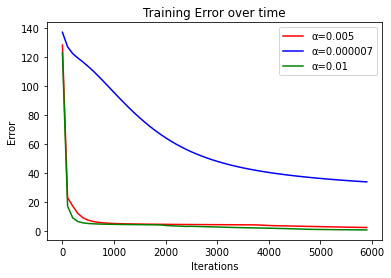

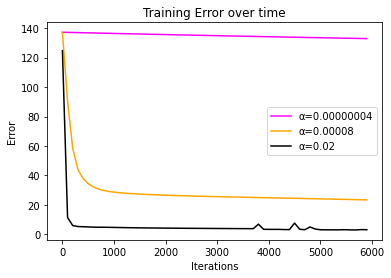

In [431]:
fig,ax=pyplot.subplots()
t=np.array(range(0,len(errors1),1))*100

ax.plot(t,errors1,c='red',label='α=0.005')
ax.plot(t,errors2,c='blue',label='α=0.000007')
ax.plot(t,errors3,c='green',label='α=0.01')


ax.set_title('Training Error over time')
ax.set_ylabel("Error")
ax.set_xlabel("Iterations")
ax.legend(loc='best')

fig1,ax1=pyplot.subplots()
t=np.array(range(0,len(errors1),1))*100


ax1.plot(t,errors6,c='magenta',label='α=0.00000004')
ax1.plot(t,errors7,c='orange',label='α=0.00008')
ax1.plot(t,errors4,c='black',label='α=0.02')

ax1.set_title('Training Error over time')
ax1.set_ylabel("Error")
ax1.set_xlabel("Iterations")
ax1.legend(loc='best')


Clearly the best alpha=0.01 which gives an accuracy of 100% on the validation data set (we have yet to see how it performs on unseen data, the testing data set). As one can see, the performance decreases as the alpha value decreases. This suggests that there was a slow convergence while training and by the time our algorithm reached the maximum number of epochs, it had not learned the data set thoroughly yet and not reached the local minimum. Let's see how our model performs on unseen data. 

In [432]:
NewTheta1,NewTheta2,errors=back(Theta1,Theta2,0.01,XValidation,yValidation,rowsValid) #using validation

#predicting on unseen data
a2,h=forward(NewTheta1,NewTheta2,XTesting,rowsTest)
h=h[0]
h=classify(h,rowsTest,"sigmoid")
acc=accuracy(h,yTesting)
print("The model predicted values of Asteroseismology unseen dataset with an accuracy of "+str(acc)+" %")


The model predicted values of Asteroseismology unseen dataset with an accuracy of 95.0 %


Based on this accuracy on unseen data we are inclined to do some more exploratory analysis.

### $\textbf{Performing regularization}$
We will perform regularization to test whether it improves generalizability.

The average regularized gradient is performed as follows:
$D^{(l)}_{ij}=\frac{1}{n} D^{(l)}_{ij}+ \lambda \Theta^{(l)}_{ij}$ if $j \not= 0$, otherwise $\frac{1}{n} D^{(l)}_{ij}$


In [412]:
def backReg(Theta1,Theta2,X,y,rows):

    alpha=0.01

    epoch=60000 #number of iterations 
    lamda=0.5

    trows,tcol=Theta1.shape

    errors=[] #this will store all the cost function errors
    for i in range(epoch): #this will run until the number of max epochs are reached 

        a,h=forward(Theta1,Theta2,X,rows) #computes {a2,a3} via forward prop
        h_delta=h-y  #computes delta(L)

        #computing the errors {delta(L-1),....,delta(2)}
        a_error= np.dot(Theta2.T[1:4],h_delta) 

        a_delta= a_error*sigmoid_derivative(a)

        #we will now compute the gradients Delta1, Delta2
        Delta1=np.dot(a_delta,X) #X=a1 #3x4

        a=np.hstack(((np.ones((rows,1))), a.T))
        Delta2=np.dot(a.T,h_delta.T).T #1x4

        #regularize

        for i in range(trows):
            for j in range(tcol):
                if(j!=0):
                    Delta1=(1/rows)*Delta1+lamda*Theta1
                    
                else:
                    Delta1=(1/rows)*Delta1
               
        for i in range(tcol):
            if(i!=0):
                Delta2=(1/rows)*Delta2+lamda*Theta2
            else:
                Delta2=(1/rows)*Delta2


        #update weights via gradient step
        Theta1=Theta1-alpha*Delta1

        Theta2=Theta2-alpha*Delta2

        #computing the error 
        if i%1000==0:
            a,h=forward(Theta1,Theta2,X,rows)
            errors.append(-np.sum(y*np.log(h)+(1-y)*np.log(1-h)))
 
    return Theta1,Theta2,errors



In [433]:
print("When regularization is implemented:")
NewTheta1,NewTheta2,errors=backReg(Theta1,Theta2,XValidation,yValidation,rowsValid) #using validation
a2,h=forward(NewTheta1,NewTheta2,XValidation,rowsValid)
h=h[0]
h=classify(h,rowsValid,"sigmoid")
acc=accuracy(h,yValidation)
print("The model predicted values of Asteroseismology dataset with an accuracy of "+str(acc)+" %")

#predicting on unseen data
a2,h=forward(NewTheta1,NewTheta2,XTesting,rowsTest)
h=h[0]
h=classify(h,rowsTest,"sigmoid")
acc=accuracy(h,yTesting)
print("The model predicted values of Asteroseismology unseen dataset with an accuracy of "+str(acc)+" %")

When regularization is implemented:
The model predicted values of Asteroseismology dataset with an accuracy of 70.64676616915423 %
The model predicted values of Asteroseismology unseen dataset with an accuracy of 81.5 %


In this case regularization does not improve generalizability as can be seen by comparing the accuracy of the unseen dataset when regularizing and not regularizing. The key point of regularizarition is to avoid overfitting but our model performed well on unseen data, therefore it seems that regularization is penalizing the weights too much (or unnecessarily) which results in a model that underfits on the data that it trained on (the validation dataset) and generalizes poorly on unseen data (the testing dataset).

### $\textbf{Exploring the effect of different activation functions}$

We will explore 2 other kinds of activation functions, the first is the tanh activation function and the second is the ReLU activation function. 

We will use the tanh function provided by numpy but for extra information tanh= $\frac{sinh(z)}{cosh(z)}= \frac{e^{z}-e^{z}}{e^{z}+e^{z}}$

The derivative of tanh is given by $1-tanh^{2}(z)$

The ReLU function is given by $max(0,z)$ and the derivative is given by $1$ if $z>=0$ else $0$ 

In [108]:
def tanh(x):
    return np.tanh(x)

In [109]:
def tanh_derivative(x):
    return 1-np.square(np.tanh(x) )

In [172]:
def ReLU(x):

    rows,col=x.shape
    for i in range(rows):
        for j in range(col):
            x[i][j]=np.max([0,x[i][j]])
   
    return x

In [174]:
def ReLU_derivative(x):

    rows,col=x.shape
    for i in range(rows):
        for j in range(col):
            if(x[i][j]>=0):
                x[i][j]=1
            else:
                x[i][j]=0
    
    return x

In [157]:
def forward1(Theta1,Theta2,X,rows,activation):

    if(activation=="tanh"):
        a=tanh(np.dot(Theta1,X.T))
    else:
        a=ReLU(np.dot(Theta1,X.T))


    abias=np.hstack(((np.ones((rows,1))), a.T))

    if(activation=="tanh"):
        h=tanh(np.dot(Theta2,abias.T))
    else:
        # print("yayyyyyy RELU")
        h=ReLU(np.dot(Theta2,abias.T))
    
    # h=h.T
    return a,h

In [152]:
def back1(Theta1,Theta2,alpha,X,y,rows,activation):
    epoch=60000 #number of iterations 
    if(activation=="ReLU"):
        epoch=20000
    # alpha=0.002 #learning rate
    errors=[] #this will store all the cost function errors
    for i in range(epoch):

        a,h=forward1(Theta1,Theta2,X,rows,activation)
        h_delta=h-y 

        a_error= np.dot(Theta2.T[1:4],h_delta) 

        if(activation=="tanh"):
            a_delta= a_error*tanh_derivative(a)
        else:
            a_delta= a_error*ReLU_derivative(a)

        Delta1=np.dot(a_delta,X) #X=a1 #3x4

        a=np.hstack(((np.ones((rows,1))), a.T))
        Delta2=np.dot(a.T,h_delta.T).T #1x4


        #update weights via gradeint step
        Theta1=Theta1-alpha*Delta1

        Theta2=Theta2-alpha*Delta2

        if i%1000==0:
            a,h=forward1(Theta1,Theta2,X,rows,activation)
            # print(y[0]*np.log(h[0]+(1-y[0])*np.log(1-h[0])))
            errors.append(-np.sum(y*np.log(h)+(1-y)*np.log(1-h)))
            # print(errors)

    return Theta1,Theta2,errors

The model predicted values of Asteroseismology dataset using tanh with an accuracy of 94.02985074626866 %
The model predicted values of Asteroseismology dataset using tanh on unseen data with an accuracy of 93.0 %


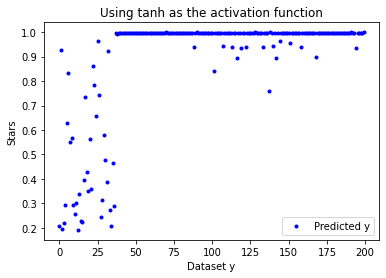

In [343]:
#---------------------------------------------------------------------training tanh---------------------------------------------------------------------#
NewTheta1,NewTheta2,errors=back1(Theta1,Theta2,0.01,XValidation,yValidation,rowsValid,"tanh")
a2,h=forward1(NewTheta1,NewTheta2,XValidation,rowsValid,"tanh")

h=h[0]
h=classify(h,rowsValid,"tanh")
acc=accuracy(h,yValidation)
print("The model predicted values of Asteroseismology dataset using tanh with an accuracy of "+str(acc)+" %")

#seeing how it performs on unseen data
a2,h=forward1(NewTheta1,NewTheta2,XTesting,rowsTest,"tanh")
h=h[0]

# print(h)
fig,ax1=pyplot.subplots()
ax1.scatter(np.arange(0,rowsTest,1),h.T,marker = '.',label="Predicted y",color='blue')
ax1.set_ylabel("Stars")
ax1.set_xlabel("Dataset y")
ax1.set_title('Using tanh as the activation function')
ax1.legend()


h=classify(h,rowsTest,"tanh")
acc=accuracy(h,yTesting)
print("The model predicted values of Asteroseismology dataset using tanh on unseen data with an accuracy of "+str(acc)+" %")




In [284]:
#---------------------------------------------------------------------training ReLU---------------------------------------------------------------------#
NewTheta1,NewTheta2,errors=back1(Theta1,Theta2,0.01,XValidation,yValidation,rowsValid,"ReLU")
a2,h=forward1(NewTheta1,NewTheta2,XValidation,rowsValid,"ReLU")

h=h[0]
h=classify(h,rowsValid,"ReLU")
acc=accuracy(h,yValidation)
print("The model predicted values of Asteroseismology dataset using ReLU with an accuracy of "+str(acc)+" %")

#seeing how it performs on unseen data
a2,h=forward1(NewTheta1,NewTheta2,XTesting,rowsTest,"ReLU")
h=h[0]
h=classify(h,rowsTest,"ReLU")
acc=accuracy(h,yTesting)
print("The model predicted values of Asteroseismology dataset using ReLU on unseen data with an accuracy of "+str(acc)+" %")

The model predicted values of Asteroseismology dataset using ReLU with an accuracy of 70.64676616915423 %
The model predicted values of Asteroseismology dataset using ReLU on unseen data with an accuracy of 81.5 %


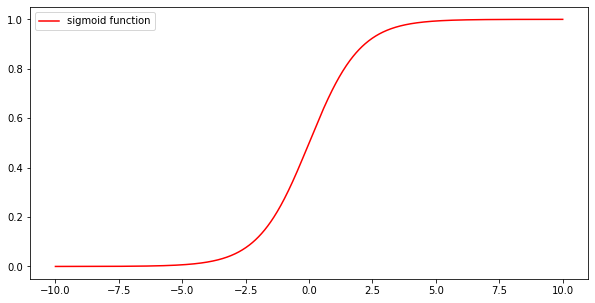

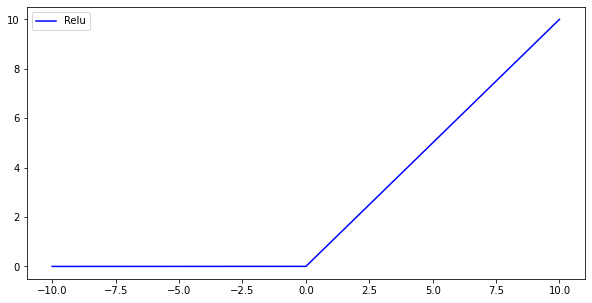

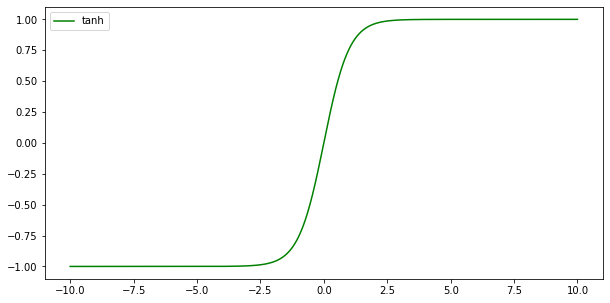

In [440]:
#plotting a sigmoid 
x = np.linspace(-10, 10, 1000)
y = 1 / (1 + np.exp(-x) )

pyplot.figure(figsize=(10, 5))
pyplot.plot(x, y,color='red')
pyplot.legend(['sigmoid function'])
pyplot.show()

#plotting a ReLU
x = np.linspace(-10, 10, 10000)
y = np.maximum(0, x)

pyplot.figure(figsize=(10, 5))
pyplot.plot(x, y,color='blue')
pyplot.legend(['Relu'])
pyplot.show()

#plotting a tanh
x = np.linspace(-10, 10, 1000)
y = np.tanh(x)

pyplot.figure(figsize=(10, 5))
pyplot.plot(x, y,color='green')
pyplot.legend(['tanh'])
pyplot.show()

Our model performs better when using the sigmoid activation function. Both the validation and testing accuracy is better when using the sigmoid function. The relatively low accuracy of the ReLU activation function suggests that it suffers from the dying ReLU problem. The negative input values are set to be zero which might make our network not learn properly hence not fitting the data well. In addition, sigmoid is probably better because it is best suited for binary classification. The output of a sigmoid is bounded between 0 and 1. On the other hand, tanh is bounded between -1 and 1 (this can be seen in the tanh graph where the upper bound is 1) and the ReLU only has a lower bound of 0, where output $\in [0,\infty)$. This probably makes them unsuited for a binary classification problem that specifically classifies between 0 and 1. 

### $\textbf{Exploring the effect of network size on generalizability }$

We will now train our model with a network that has a bigger architecture, i.e increasing the number of hidden layers.

The first model we will explore has 2 hidden layers with 3 weights matrices. The first 2 being 3x4 matrices and the last matrix being a 1x4 matrix.

We will use the sigmoid activation function using the best alpha value we found and another alpha value. 

Forward propagation will be implemented as follows:
$a^{(1)}=x$ where $x$ is the input features which include the bias.

$z^{(2)}=\Theta^{(1)}a^{(1)}$ 

$a^{(2)}=g(z^{(2)})$ where $g$ is the activation function which in this case is the sigmoid function. 

We then add the bias $a_{0}^{(2)}=1$

$z^{(3)}=\Theta^{(2)}a^{(2)}$

$a^{(3)}=g(z^{(3)})$

We then add the bias $a_{0}^{(3)}=1$

$z^{(4)}=\Theta^{(3)}a^{(3)}$

$h_{\theta}(x)=a^{(4)}=g(z^{(4)})$

We will train the network using backpropagation which is implemented as follows:

since we have 4 layers (2 of which are hidden), we have

$\delta^{(4)}=a^{(4)}-y$ where $a^{(4)}=h_{\theta}(x)$ and $y$ is the true target value of the data set. 

$\delta^{(3)}=(\Theta^{(3)})^{T}\delta^{(4)}*g^{'}(z^{(3)})$

$\delta^{(2)}=(\Theta^{(2)})^{T}\delta^{(3)}*g^{'}(z^{(2)})$ 

where the derivative $g^{'}(z^{(2)})=a^{(2)}*(1-a^{(2)})$ 

We do not compute  $\delta^{1}$ as we do not change the input. 

The weight updates will be done the same as before. 



In [24]:
# random.seed(3)
Theta1_=random.random((3, 4)) 
Theta2_=random.random((3, 4)) 
Theta3_=random.random((1, 4)) 

In [18]:

def forward2(Theta1,Theta2,Theta3,X,rows):
    
    #a1 is X essentially 

    #propagating input into first hidden layer 
    a2=sigmoid(np.dot(Theta1,X.T)) 
    a2bias=np.hstack(((np.ones((rows,1))), a2.T)) 

    #propagating second layer into second hidden layer 
    a3=sigmoid(np.dot(Theta2,a2bias.T))
    a3bias=np.hstack(((np.ones((rows,1))), a3.T))
    
    #propagating third layer into output node 
    a4=sigmoid(np.dot(Theta3,a3bias.T))

    return a2,a3,a4

In [19]:
def back2(Theta1,Theta2,Theta3,alpha,X,y,rows):
  
    epoch=60000


    errors=[]
  
    for i in range(epoch):

        a2,a3,a4=forward2(Theta1,Theta2,Theta3,X,rows)
        a4_delta=a4-y 

        a3_error=np.dot(Theta3.T[1:4],a4_delta) 
        a3_delta=a3_error*sigmoid_derivative(a3) 

        a2_error=np.dot(Theta2[:,1:],a3_delta)
        a2_delta=a2_error*sigmoid_derivative(a2)


        #computing gradients
        Delta1=np.dot(a2_delta,X) 
                                

        a2=np.hstack(((np.ones((rows,1))), a2.T)) 
        Delta2=np.dot(a3_delta,a2)

        a3=np.hstack(((np.ones((rows,1))), a3.T)) 
        Delta3=np.dot(a3.T,a4_delta.T)


        #update weights via gradient step
        Theta1=Theta1-alpha*Delta1

        Theta2=Theta2-alpha*Delta2

        Theta3=Theta3-alpha*Delta3

        #computing the error 
        if i%1000==0:
            a2,a3,h=forward2(Theta1,Theta2,Theta3,X,rows)
            errors.append(-np.sum(y*np.log(h)+(1-y)*np.log(1-h)))

    return Theta1, Theta2, Theta3,errors

When alpha=0.01:
The model predicted values of Asteroseismology validation dataset with an accuracy of 99.00497512437812 %
The model predicted values of Asteroseismology unseen dataset with an accuracy of 93.5 %


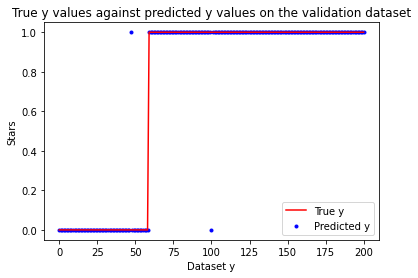

In [25]:
#first train using alpha=0.01
NewTheta1,NewTheta2,NewTheta3,errors=back2(Theta1_,Theta2_,Theta3_,0.01,XValidation,yValidation,rowsValid)

a2,a3,h=forward2(NewTheta1,NewTheta2,NewTheta3,XValidation,rowsValid)
h=h[0]
h=classify(h,rowsValid,"sigmoid")    


#plot accuracy 
#plot y against h_theta
fig,ax1=pyplot.subplots()

ax1.plot(np.arange(0,rowsValid,1),yValidation,label="True y",color='red')

ax1.scatter(np.arange(0,rowsValid,1),h.T,marker = '.',label="Predicted y",color='blue')

ax1.set_ylabel("Stars")
ax1.set_xlabel("Dataset y")
ax1.set_title('True y values against predicted y values on the validation dataset')
ax1.legend()

acc=accuracy(h,yValidation)
print("When alpha=0.01:")
print("The model predicted values of Asteroseismology validation dataset with an accuracy of "+str(acc)+" %")

#seeing how the model performs on unseen data
a2,a3,h=forward2(NewTheta1,NewTheta2,NewTheta3,XTesting,rowsTest)
h=h[0]
h=classify(h,rowsTest,"sigmoid") 
acc=accuracy(h,yTesting)
print("The model predicted values of Asteroseismology unseen dataset with an accuracy of "+str(acc)+" %")


[491.20137885763705, 53.888617441074274, 34.82331702309405, 35.148139279801526, 33.53239119288574, 34.49823287615852, 41.91258222162158, 32.08680246098194, 30.004626814703293, 29.14344663712513, 36.19413086996386, 53.88274244939382, 79.38349262977783, 59.998277723440346, 71.94476739826474, 37.435622302670126, 49.33870269387802, 29.68359335381416, 43.92557682212041, 44.144990210976545, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


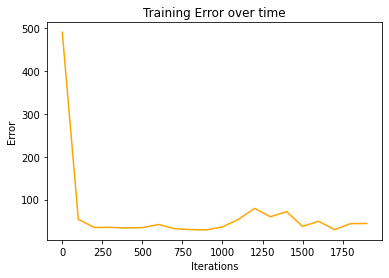

In [29]:
print(errors)
plotError(errors)

When alpha=0.009:
The model predicted values of Asteroseismology validation dataset with an accuracy of 93.53233830845771 %
The model predicted values of Asteroseismology unseen dataset with an accuracy of 92.0 %


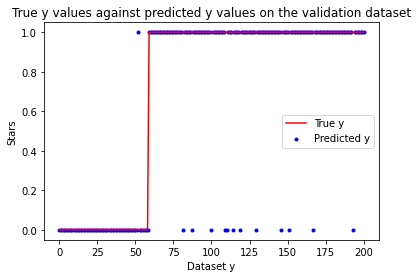

In [30]:
#Now we will train using alpha=0.009
NewTheta1,NewTheta2,NewTheta3,errors=back2(Theta1_,Theta2_,Theta3_,0.009,XValidation,yValidation,rowsValid)

a2,a3,h=forward2(NewTheta1,NewTheta2,NewTheta3,XValidation,rowsValid)
h=h[0]
h=classify(h,rowsValid,"sigmoid")    

# plotError(errors)
#plot accuracy 
#plot y against h_theta
fig,ax1=pyplot.subplots()

ax1.plot(np.arange(0,rowsValid,1),yValidation,label="True y",color='red')

ax1.scatter(np.arange(0,rowsValid,1),h.T,marker = '.',label="Predicted y",color='blue')

ax1.set_ylabel("Stars")
ax1.set_xlabel("Dataset y")
ax1.set_title('True y values against predicted y values on the validation dataset')
ax1.legend()

acc=accuracy(h,yValidation)
print("When alpha=0.009:")
print("The model predicted values of Asteroseismology validation dataset with an accuracy of "+str(acc)+" %")

#seeing how the model performs on unseen data
a2,a3,h=forward2(NewTheta1,NewTheta2,NewTheta3,XTesting,rowsTest)
h=h[0]
h=classify(h,rowsTest,"sigmoid") 
acc=accuracy(h,yTesting)
print("The model predicted values of Asteroseismology unseen dataset with an accuracy of "+str(acc)+" %")

[491.2630010500018, 39.19430367184872, 32.4725570597203, 31.533593770381735, 30.560876867274082, 29.832013955119635, 29.243939228733705, 34.75557619983056, 35.4945328805494, 83.34521811756608, 47.05712209379058, 57.750492839403556, 47.949029224754995, 48.91939025444337, 45.221219507115, 86.03020649655787, 91.88024401418842, 81.33443838112358, 62.46977933275871, 1201.9884014543254, 1106.6103480130273, 1197.2071664967955, 1206.8549650852133, 1203.708002886945, 1207.022554371034, 1103.1649876939866, 1207.149581289726, 1207.2313718516752, 1207.3075787286714, 1207.3032888809228, 1207.2965844380406, 1207.2834513477092, 1207.239827838709, 1182.8290614370878, 1207.3136790567482, 1207.3111600966918, 1207.3075289251478, 1207.3016473001946, 1207.289962869093, 1207.2524085421364, 1204.0727971993301, 1207.0448989700208, 1205.6056687395499, 1205.8329647557912, 1212.5284528972518, 1207.2066379378498, 1207.3079517280626, 1207.2889196816043, 1207.1577780970094, 1206.3351241595178, 1207.2353161845392, 1

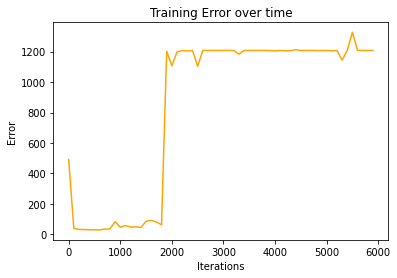

In [32]:
print(errors)
plotError(errors)

Our 2 hidden layer network performs better when alpha=0.009, however it does not generalize better on the unseen data compared to the network that has 1 hidden layer. This might suggest slight overfitting while training. We will now train on a network that has 3 hidden layers. The first 3 weights will be 3x4 matrices while the last weight is a 1x4 matrix.

Once again we will train using the best alpha value we had previously found and another alpha value. 

In [35]:
# random.seed(3)
Theta1_=random.random((3, 4)) 
Theta2_=random.random((3, 4)) 
Theta3_=random.random((3, 4)) 
Theta4_=random.random((1, 4)) 

In [36]:

def forward3(Theta1,Theta2,Theta3,Theta4,X,rows):
    
    #a1 is X essentially 

    #propagating input into first hidden layer 
    a2=sigmoid(np.dot(Theta1,X.T)) #3x600
    a2bias=np.hstack(((np.ones((rows,1))), a2.T)) #600x4

    #propagating second layer into second hidden layer 
    a3=sigmoid(np.dot(Theta2,a2bias.T))
    a3bias=np.hstack(((np.ones((rows,1))), a3.T))
    
    #propagating third layer into third hidden layer
    a4=sigmoid(np.dot(Theta3,a3bias.T))
    a4bias=np.hstack(((np.ones((rows,1))), a4.T))

    #propagating third layer into output node 
    a5=sigmoid(np.dot(Theta4,a4bias.T))

    return a2,a3,a4,a5

In [37]:

def back3(Theta1,Theta2,Theta3,Theta4,alpha,X,y,rows):
  
    epoch=60000
  
    errors=[]
  
    for i in range(epoch):

        a2,a3,a4,a5=forward3(Theta1,Theta2,Theta3,Theta4,X,rows)

        a5_delta=a5-y 
        a4_error=np.dot(Theta4.T[1:4],a5_delta)
        a4_delta=a4_error*sigmoid_derivative(a4)

        a3_error=np.dot(Theta3[:,1:],a4_delta) 
        a3_delta=a3_error*sigmoid_derivative(a3) 

        a2_error=np.dot(Theta2[:,1:],a3_delta) 
        a2_delta=a2_error*sigmoid_derivative(a2)


        Delta1=np.dot(a2_delta,X) 

        a2=np.hstack(((np.ones((rows,1))), a2.T))
        Delta2=np.dot(a3_delta,a2) 

        a3=np.hstack(((np.ones((rows,1))), a3.T)) 
        Delta3=np.dot(a4_delta,a3)

        a4=np.hstack(((np.ones((rows,1))), a4.T))
        Delta4=np.dot(a4.T,a5_delta.T)


        #update weights via gradient step
        Theta1=Theta1-alpha*Delta1

        Theta2=Theta2-alpha*Delta2

        Theta3=Theta3-alpha*Delta3

        Theta4=Theta4-alpha*Delta4

        #computing the error 
        if i%1000==0:
            a2,a3,a4,a5=forward3(Theta1,Theta2,Theta3,Theta4,X,rows)
            errors.append(-np.sum(y*np.log(a5)+(1-y)*np.log(1-a5)))


    return Theta1, Theta2, Theta3, Theta4,errors

In [38]:
def Train3hidden(Theta1_,Theta2_,Theta3_,Theta4_,alpha,XValidation,yValidation,rowsValid):
    NewTheta1,NewTheta2,NewTheta3,NewTheta4,errors=back3(Theta1_,Theta2_,Theta3_,Theta4_,alpha,XValidation,yValidation,rowsValid)

    a2,a3,a4,h=forward3(NewTheta1,NewTheta2,NewTheta3,NewTheta4,XValidation,rowsValid)


    h=h[0]
    h=classify(h,rowsValid,"sigmoid")    

    acc=accuracy(h,yValidation)
    print("The model predicted values of Asteroseismology validation dataset with an accuracy of "+str(acc)+" %")

    fig,ax1=pyplot.subplots()

    ax1.plot(np.arange(0,rowsValid,1),yValidation,label="True y",color='red')

    ax1.scatter(np.arange(0,rowsValid,1),h.T,marker = '.',label="Predicted y",color='blue')

    ax1.set_ylabel("Stars")
    ax1.set_xlabel("Dataset y")
    ax1.set_title('True y values against predicted y values on the validation dataset')
    ax1.legend()


    return NewTheta1,NewTheta2,NewTheta3,NewTheta4,errors


When alpha=0.01:
The model predicted values of Asteroseismology validation dataset with an accuracy of 70.64676616915423 %
The model predicted values of Asteroseismology unseen dataset with an accuracy of 81.5 %


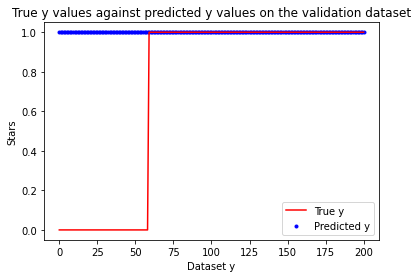

In [39]:
#training using alpha=0.01
print("When alpha=0.01:")
NewTheta1,NewTheta2,NewTheta3,NewTheta4,errors=Train3hidden(Theta1_,Theta2_,Theta3_,Theta4_,0.01,XValidation,yValidation,rowsValid)

#seeing how the model performs on unseen data 
a2,a3,a4,h=forward3(NewTheta1,NewTheta2,NewTheta3,NewTheta4,XTesting,rowsTest)
h=h[0]
h=classify(h,rowsTest,"sigmoid")   


acc=accuracy(h,yTesting)
print("The model predicted values of Asteroseismology unseen dataset with an accuracy of "+str(acc)+" %")


[488.3755652558202, 189.67648411911145, 792.5635145279707, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, 755.5191902393603, 751.5358887976624, 744.1029706129721, 832.3982870419052, 756.6463249644971, 831.350144907622, 833.0540189836818, 833.0380522013867, 832.7683518396082, 833.1747474447025, 833.1742769583249, 833.1737350343801, 833.1730869289615, 833.1722817742628, 833.171237104381, 833.1698050179303, 833.1676858091739, 833.1641574863868, 833.1569023240006, 833.1318951395257, 833.2104553051179, 833.2104536681597, 833.2104520261787, 833.2104503790412, 833.2104487266092, 833.2104470687498, 833.2104454053183, 833.2104437361756, 833.2104420611784, 833.2104403801807, 833.2104386930341, 833.21043699959, 833.2104352996937, 833.210433593192, 833.2104318799255, 833.2104301597353, 833.2104284324591, 833.2104266979293, 833.2104249559795, 833.210423206438, 833.2104214491277]


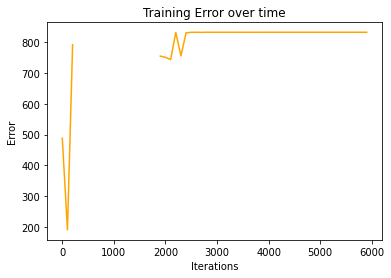

In [42]:
print(errors)
plotError(errors)

When alpha=0.009:
The model predicted values of Asteroseismology validation dataset with an accuracy of 70.64676616915423 %
The model predicted values of Asteroseismology unseen dataset with an accuracy of 81.5 %


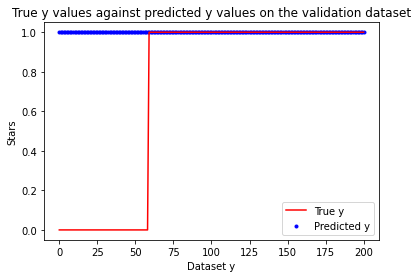

In [395]:
#now training using alpha= 0.009
print("When alpha=0.009:")
NewTheta1,NewTheta2,NewTheta3,NewTheta4,errors=Train3hidden(Theta1_,Theta2_,Theta3_,Theta4_,0.009,XValidation,yValidation,rowsValid)

#seeing how the model performs on unseen data 
a2,a3,a4,h=forward3(NewTheta1,NewTheta2,NewTheta3,NewTheta4,XTesting,rowsTest)
h=h[0]
h=classify(h,rowsTest,"sigmoid")   


acc=accuracy(h,yTesting)
print("The model predicted values of Asteroseismology unseen dataset with an accuracy of "+str(acc)+" %")

When alpha=0.0009:
The model predicted values of Asteroseismology validation dataset with an accuracy of 99.00497512437812 %
The model predicted values of Asteroseismology unseen dataset with an accuracy of 95.5 %


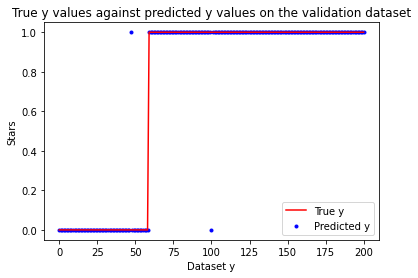

In [43]:
#now training using alpha= 0.0009
print("When alpha=0.0009:")
NewTheta1,NewTheta2,NewTheta3,NewTheta4,errors=Train3hidden(Theta1_,Theta2_,Theta3_,Theta4_,0.0009,XValidation,yValidation,rowsValid)

#seeing how the model performs on unseen data 
a2,a3,a4,h=forward3(NewTheta1,NewTheta2,NewTheta3,NewTheta4,XTesting,rowsTest)
h=h[0]
h=classify(h,rowsTest,"sigmoid")   


acc=accuracy(h,yTesting)
print("The model predicted values of Asteroseismology unseen dataset with an accuracy of "+str(acc)+" %")

[495.14177418977636, 514.170094009699, 322.21653232130325, 232.141402414832, 229.02136898928663, 680.249375435977, 680.3897124712494, 680.4163550445148, 680.4266590776764, 680.4314809882566, 680.4337165498847, 680.4344353112965, 680.4340697826058, 680.4327292465946, 680.4302217918417, 680.4257433915413, 680.4163075179263, 680.387046673714, 680.1935704228756, 599.9824537690006, 595.1053814676745, 590.8576820039118, 590.1275549563333, 588.643729760469, 587.2898714827459, 585.964074225622, 584.5549809955321, 582.885342511906, 580.4766334932805, 575.2378462977795, 569.1667874950701, 566.6576169454364, 564.9320405313222, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]


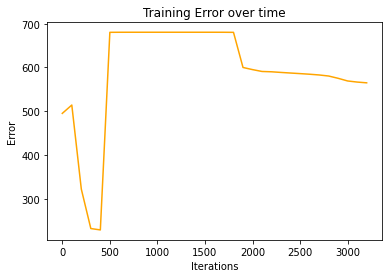

In [47]:
print(errors)
plotError(errors)


After a lot of exploratory analysis, the best model is the network that has 3 layers using a sigmoid activation function with the alpha value of 0.0009 and epoch of 60000. Although this network performed slightly worse than the network with 1 hidden layer on the validation data set, it generalized better on unseen data with an accuracy of 96.5% on the testing data set. This suggests that the network with 1 hidden layer slightly overfitted while training (recalling that it had 100% accuracy on the validation data). 

In [1]:
print(errors)

NameError: name 'errors' is not defined